## Exploratory Data Analysis
Let's start by cleaning and organizing the data: 

In [2]:
import pandas as pd

# Load the data from the first sheet to inspect its structure
data = pd.read_excel('../data/CPU_Memory_Series.xlsx', sheet_name='Sheet1')

# Display the first few rows of the data to understand its format and content
data.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,CPU saturation,Unnamed: 22,Unnamed: 23,Unnamed: 24,Memory Utilization,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,iteration,CPS,Time Start,Time Stop,Network Function,Cluster,Master / Worker,Namespace,Microservice,Pod,...,CPU utilization (%),CPU saturation avg (mcore),CPU saturation std,CPU saturation max (mcore),CPU saturation min (mcore),Memory utilization avg (Mi),Memory utilization std,Memory utilization max (Mi),Memory utilization min (Mi),Memory utilization (%)
1,0,0,11/06/24 15:05,11/06/24 15:10,UDM,capo-28037-pool1-xxpmf,Unknown Cluster type,eric-ccsm,eric-ausf-capacity,eric-ausf-capacity-566b7bd67d-4qxsp,...,0.022798,0,0,0,0,15.1,0,15.1,15.1,0.133608
2,0,0,11/06/24 15:05,11/06/24 15:10,UDM,capo-28037-pool1-4d8fr,Unknown Cluster type,eric-ccsm,eric-ausf-capacity,eric-ausf-capacity-566b7bd67d-gp75p,...,0.020314,0,0,0,0,11.33,0.0243,11.34,11.29,0.100277
3,0,0,11/06/24 15:05,11/06/24 15:10,UDM,capo-28037-pool1-lk5nv,Unknown Cluster type,eric-ccsm,eric-ausf-capacity,eric-ausf-capacity-566b7bd67d-wgxp7,...,0.023682,0,0,0,0,14.81,0,14.81,14.81,0.131084
4,0,0,11/06/24 15:05,11/06/24 15:10,UDM,capo-28037-pool1-gsjs7,Unknown Cluster type,eric-ccsm,eric-ausf-cmjobloader,eric-ausf-cmjobloader-6f559dc4b-97bdh,...,0.000158,0,0,0,0,15.64,0.0255,15.67,15.61,0.078203


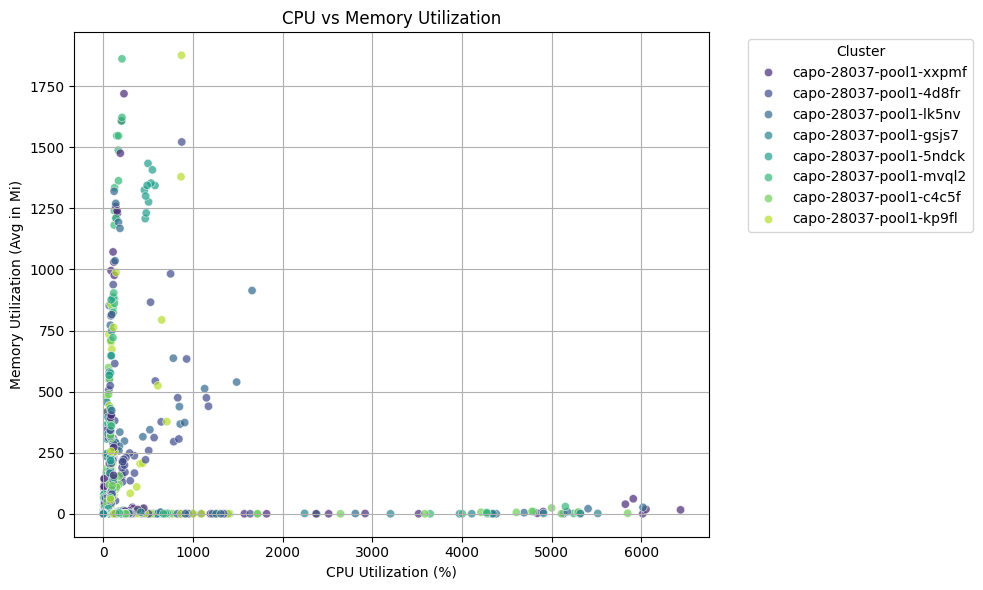

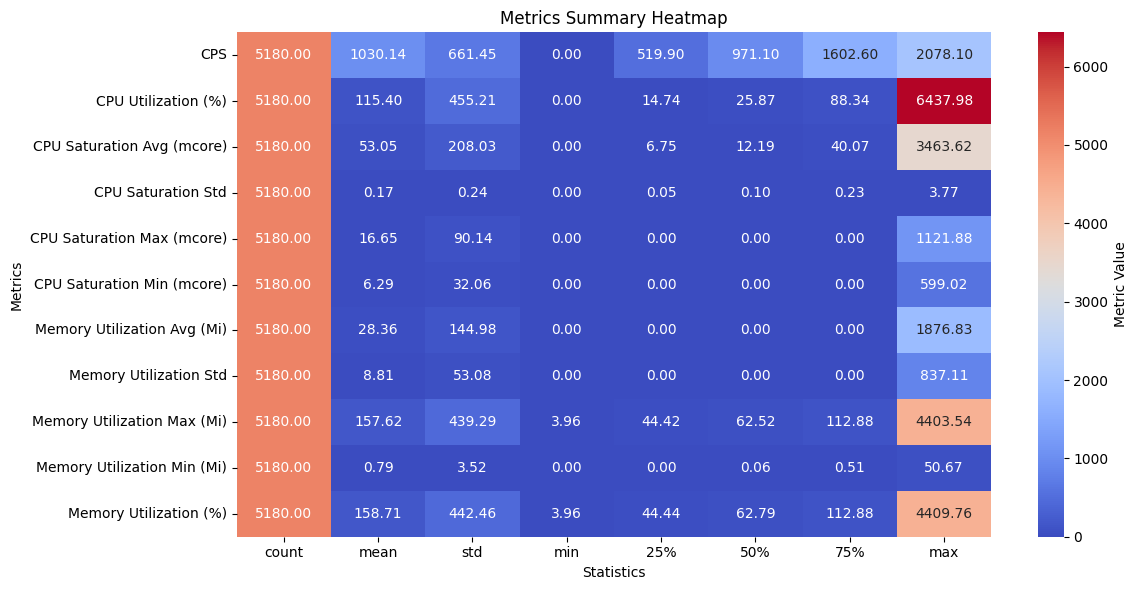

In [3]:

# Clean the dataset by renaming columns and dropping unnecessary rows
# Assuming the first row after the header row contains valid data

# Renaming columns based on the first row
# Adjusting column renaming to match the dataset's column count
data.columns = [
    "Iteration", "CPS", "Time Start", "Time Stop", "Network Function", 
    "Cluster", "Master/Worker", "Namespace", "Microservice", "Pod",
    "Pod Age", "Pod Age Unit", "Pod Resource Limits CPU", 
    "Pod Resource Limits Memory", "Pod Resource Requests CPU",
    "Pod Resource Requests Memory", "Pod Resource Requests Factor CPU", 
    "Pod Resource Requests Factor Memory", "CPU Utilization (%)", 
    "CPU Saturation Avg (mcore)", "CPU Saturation Std", "CPU Saturation Max (mcore)",
    "CPU Saturation Min (mcore)", "Memory Utilization Avg (Mi)", 
    "Memory Utilization Std", "Memory Utilization Max (Mi)", 
    "Memory Utilization Min (Mi)", "Memory Utilization (%)",
    "Extra Column 1", "Extra Column 2"  # Placeholder names for extra columns
]

# Dropping the first row if it contains header placeholders
cleaned_data = data[1:].reset_index(drop=True)


# Converting numeric columns to appropriate data types
numeric_columns = [
    "CPS", "CPU Utilization (%)", "CPU Saturation Avg (mcore)", 
    "CPU Saturation Std", "CPU Saturation Max (mcore)", 
    "CPU Saturation Min (mcore)", "Memory Utilization Avg (Mi)", 
    "Memory Utilization Std", "Memory Utilization Max (Mi)", 
    "Memory Utilization Min (Mi)", "Memory Utilization (%)"
]
for col in numeric_columns:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

# Display cleaned data for user review
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Scatter plot for CPU vs Memory Utilization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cleaned_data,
    x="CPU Utilization (%)",
    y="Memory Utilization Avg (Mi)",
    hue="Cluster",  # Example of adding a categorical variable for color coding
    palette="viridis",
    alpha=0.7
)

plt.title("CPU vs Memory Utilization")
plt.xlabel("CPU Utilization (%)")
plt.ylabel("Memory Utilization (Avg in Mi)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# Statistical summary of key metrics
metrics_summary = cleaned_data[numeric_columns].describe()

# Display the summary for user review
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose the summary for better visualization
metrics_summary_transposed = metrics_summary.T  # Rows become columns for heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(
    metrics_summary_transposed,
    annot=True,  # Display values in each cell
    fmt=".2f",  # Format numbers to two decimal places
    cmap="coolwarm",
    cbar_kws={'label': 'Metric Value'}
)

plt.title("Metrics Summary Heatmap")
plt.xlabel("Statistics")
plt.ylabel("Metrics")
plt.tight_layout()

# Show the plot
plt.show()



/tmp/ipykernel_3376/1584563921.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


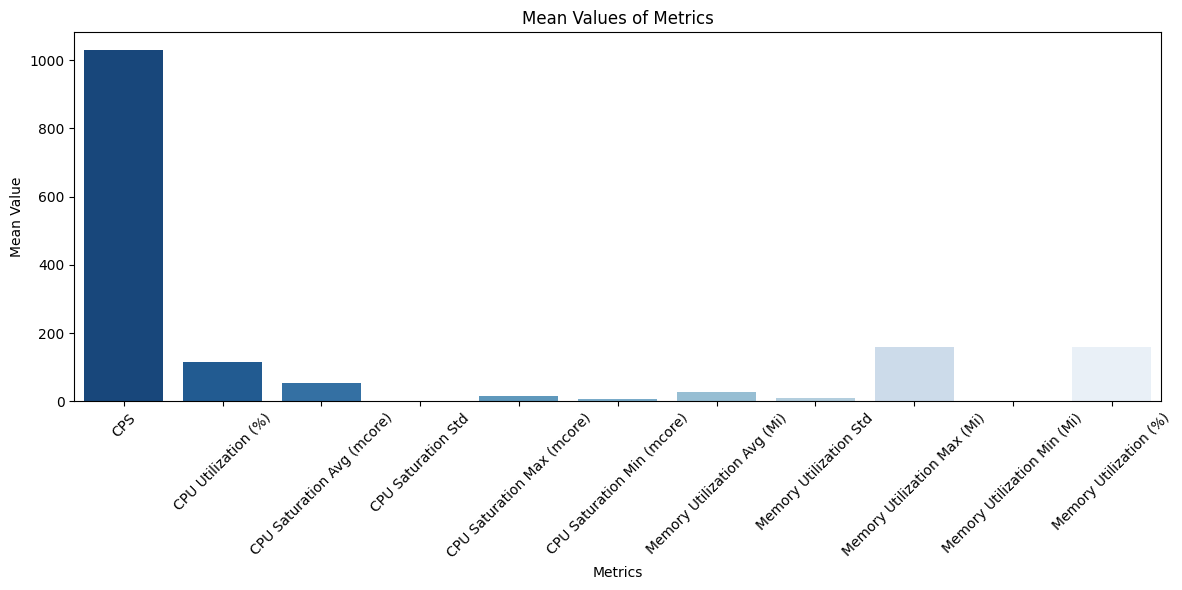

In [4]:
# Select the mean row for visualization
metrics_means = metrics_summary.loc["mean"]

plt.figure(figsize=(12, 6))
sns.barplot(
    x=metrics_means.index,
    y=metrics_means.values,
    palette="Blues_r"
)

plt.title("Mean Values of Metrics")
plt.xlabel("Metrics")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Let's pick one relevant microservice to focus the analysis on it: eric-ingressgw-udm-traffic 

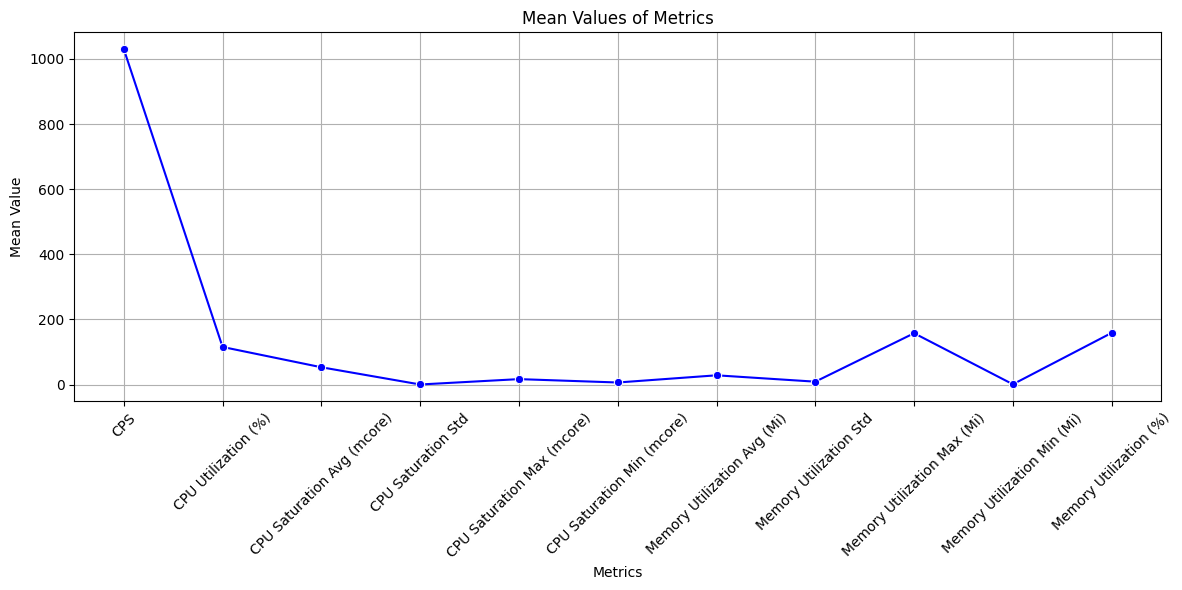

,Iteration,CPS,Time Start,Time Stop,Network Function,Cluster,Master/Worker,Namespace,Microservice,Pod,...,CPU Saturation Std,CPU Saturation Max (mcore),CPU Saturation Min (mcore),Memory Utilization Avg (Mi),Memory Utilization Std,Memory Utilization Max (Mi),Memory Utilization Min (Mi),Memory Utilization (%),Extra Column 1,Extra Column 2
254,0,0.000000,11/06/24 15:05,11/06/24 15:10,UDM,capo-28037-pool1-xxpmf,Unknown Cluster type,eric-ccsm,eric-ingressgw-udm-traffic,eric-ingressgw-udm-traffic-4sqzg,...,0.023585,0.0,0.0,0.0,0.0,132.90,1.0862,134.30,131.75,0.189861
255,0,0.000000,11/06/24 15:05,11/06/24 15:10,UDM,capo-28037-pool1-kp9fl,Unknown Cluster type,eric-ccsm,eric-ingressgw-udm-traffic,eric-ingressgw-udm-traffic-bshc7,...,0.020087,0.0,0.0,0.0,0.0,127.99,0.0183,128.01,127.97,0.182838
256,0,0.000000,11/06/24 15:05,11/06/24 15:10,UDM,capo-28037-pool1-c4c5f,Unknown Cluster type,eric-ccsm,eric-ingressgw-udm-traffic,eric-ingressgw-udm-traffic-j245l,...,0.022632,0.0,0.0,0.0,0.0,134.18,0.0146,134.19,134.14,0.191682
257,0,0.000000,11/06/24 15:05,11/06/24 15:10,UDM,capo-28037-pool1-5ndck,Unknown Cluster type,eric-ccsm,eric-ingressgw-udm-traffic,eric-ingressgw-udm-traffic-qfwgg,...,0.021485,0.0,0.0,0.0,0.0,136.28,1.1330,137.70,135.08,0.19469
258,0,0.000000,11/06/24 15:05,11/06/24 15:10,UDM,capo-28037-pool1-mvql2,Unknown Cluster type,eric-ccsm,eric-ingressgw-udm-traffic,eric-ingressgw-udm-traffic-sbt2c,...,0.027991,0.0,0.0,0.0,0.0,143.71,1.1713,145.11,142.42,0.205304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4919,9,2078.100098,11/06/24 15:51,11/06/24 15:56,UDM,capo-28037-pool1-5ndck,Unknown Cluster type,eric-ccsm,eric-ingressgw-udm-traffic,eric-ingressgw-udm-traffic-qfwgg,...,0.897930,0.0,0.0,0.0,0.0,145.20,0.0211,145.26,145.18,0.207435
4920,9,2078.100098,11/06/24 15:51,11/06/24 15:56,UDM,capo-28037-pool1-mvql2,Unknown Cluster type,eric-ccsm,eric-ingressgw-udm-traffic,eric-ingressgw-udm-traffic-sbt2c,...,1.060546,0.0,0.0,0.0,0.0,153.61,0.0442,153.66,153.52,0.21944
4921,9,2078.100098,11/06/24 15:51,11/06/24 15:56,UDM,capo-28037-pool1-4d8fr,Unknown Cluster type,eric-ccsm,eric-ingressgw-udm-traffic,eric-ingressgw-udm-traffic-t58nf,...,2.301038,0.0,0.0,0.0,0.0,144.57,0.4945,145.93,144.19,0.206526
4922,9,2078.100098,11/06/24 15:51,11/06/24 15:56,UDM,capo-28037-pool1-lk5nv,Unknown Cluster type,eric-ccsm,eric-ingressgw-udm-traffic,eric-ingressgw-udm-traffic-trbcs,...,2.034134,0.0,0.0,0.0,0.0,148.16,0.1556,148.33,148,0.211662


In [5]:
# Filter the dataset for the microservice "eric-ingressgw-udm-traffic"
selected_microservice = "eric-ingressgw-udm-traffic"
microservice_data = cleaned_data[cleaned_data["Microservice"] == selected_microservice]

# Check if data exists for this microservice
if not microservice_data.empty:
    # Display the data for the selected microservice
       
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        x=metrics_summary.columns,
        y=metrics_summary.loc["mean"],
        marker="o",
        linestyle="-",
        color="blue"
    )

    plt.title("Mean Values of Metrics")
    plt.xlabel("Metrics")
    plt.ylabel("Mean Value")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

else:
    microservice_data = None

microservice_data


Create a time series of the CPU load of the eric-ingressgw-udm-traffic microservice: 

/tmp/ipykernel_3376/2102331787.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series_cpu_per_cluster["Time Start"] = pd.to_datetime(time_series_cpu_per_cluster["Time Start"], errors='coerce')


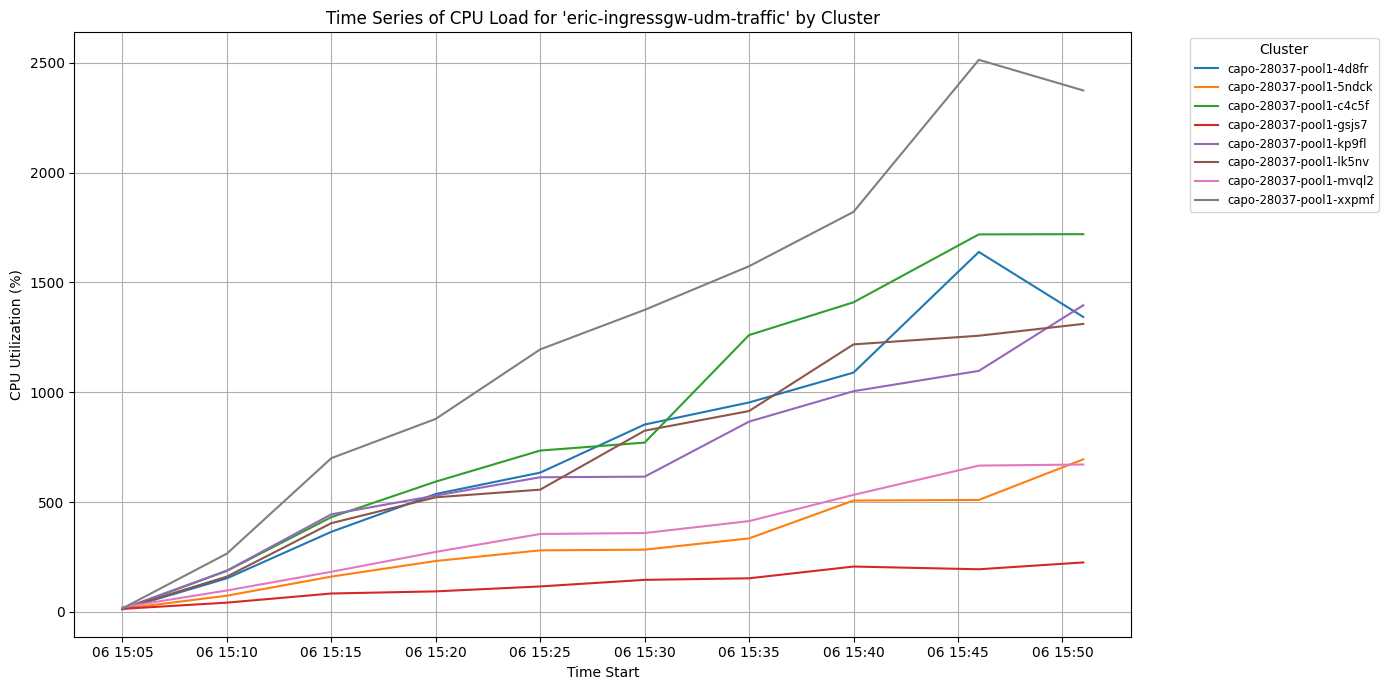

In [6]:
# Create a time series of CPU load for the selected microservice grouped by cluster
time_series_cpu_per_cluster = microservice_data.groupby(["Time Start", "Cluster"])["CPU Utilization (%)"].mean().reset_index()

# Sort the data for plotting
time_series_cpu_per_cluster["Time Start"] = pd.to_datetime(time_series_cpu_per_cluster["Time Start"], errors='coerce')
time_series_cpu_per_cluster = time_series_cpu_per_cluster.sort_values(by=["Time Start", "Cluster"])

# Plot the time series
plt.figure(figsize=(14, 7))
for cluster in time_series_cpu_per_cluster["Cluster"].unique():
    cluster_data = time_series_cpu_per_cluster[time_series_cpu_per_cluster["Cluster"] == cluster]
    plt.plot(
        cluster_data["Time Start"],
        cluster_data["CPU Utilization (%)"],
        label=cluster
    )

# Customize the plot
plt.title("Time Series of CPU Load for 'eric-ingressgw-udm-traffic' by Cluster")
plt.xlabel("Time Start")
plt.ylabel("CPU Utilization (%)")
plt.legend(title="Cluster", loc="upper left", bbox_to_anchor=(1.05, 1), fontsize="small")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


Store time CPU load time series of capo-28037-pool1-xxpmf cluster in file

In [7]:
# Filter the time series for the specific cluster "xxpmf"
time_series_cpu_xxpmf = time_series_cpu_per_cluster[time_series_cpu_per_cluster["Cluster"] == "capo-28037-pool1-xxpmf"]

# Save the filtered time series to a CSV file
output_file_path_xxpmf = "../data/eric_ingressgw_udm_traffic_cpu_time_series_xxpmf.csv"
time_series_cpu_xxpmf.to_csv(output_file_path_xxpmf, index=False)

output_file_path_xxpmf


'../data/eric_ingressgw_udm_traffic_cpu_time_series_xxpmf.csv'

Now for cluster "lk5nv": 

In [8]:
# Filter the time series for the specific cluster "xxpmf"
time_series_cpu_lk5nv = time_series_cpu_per_cluster[time_series_cpu_per_cluster["Cluster"] == "capo-28037-pool1-lk5nv"]

# Save the filtered time series to a CSV file
output_file_path_lk5nv = "../data/eric_ingressgw_udm_traffic_cpu_time_series_lk5nv.csv"
time_series_cpu_lk5nv.to_csv(output_file_path_lk5nv, index=False)

output_file_path_lk5nv

'../data/eric_ingressgw_udm_traffic_cpu_time_series_lk5nv.csv'